In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-profile-two-wheeler-loan-dataset/credit_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/credit-profile-two-wheeler-loan-dataset/credit_data.csv')

In [4]:
df.shape

(279856, 15)

In [5]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [6]:
df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76499.163856,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.350155
std,15.311051,42875.575193,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.509196
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


In [7]:
df.nunique()

Age                            53
Gender                          3
Income                        201
Credit Score                  551
Credit History Length         606
Number of Existing Loans       11
Loan Amount                 55681
Loan Tenure                   348
Existing Customer               2
State                          10
City                           23
LTV Ratio                   80874
Employment Profile              5
Profile Score                 101
Occupation                     14
dtype: int64

In [8]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [9]:
cats = ['Gender','Existing Customer','State','City','Employment Profile','Occupation']
nums = ['Age','Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'LTV Ratio','Profile Score']

### Univariate:

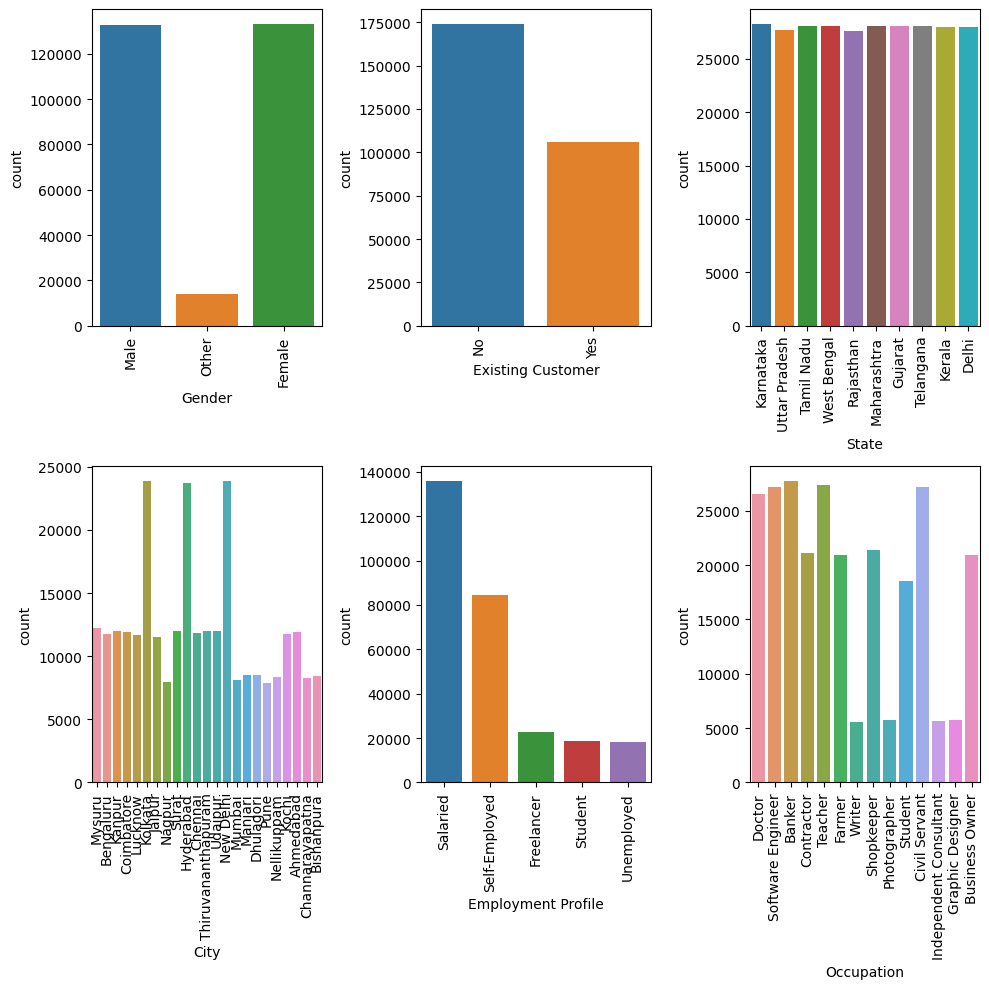

In [10]:
t = 1
plt.figure(figsize=(10,10))
for i in cats:
    plt.subplot(2,3,t)
    sns.countplot(x=df[i])
    t +=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

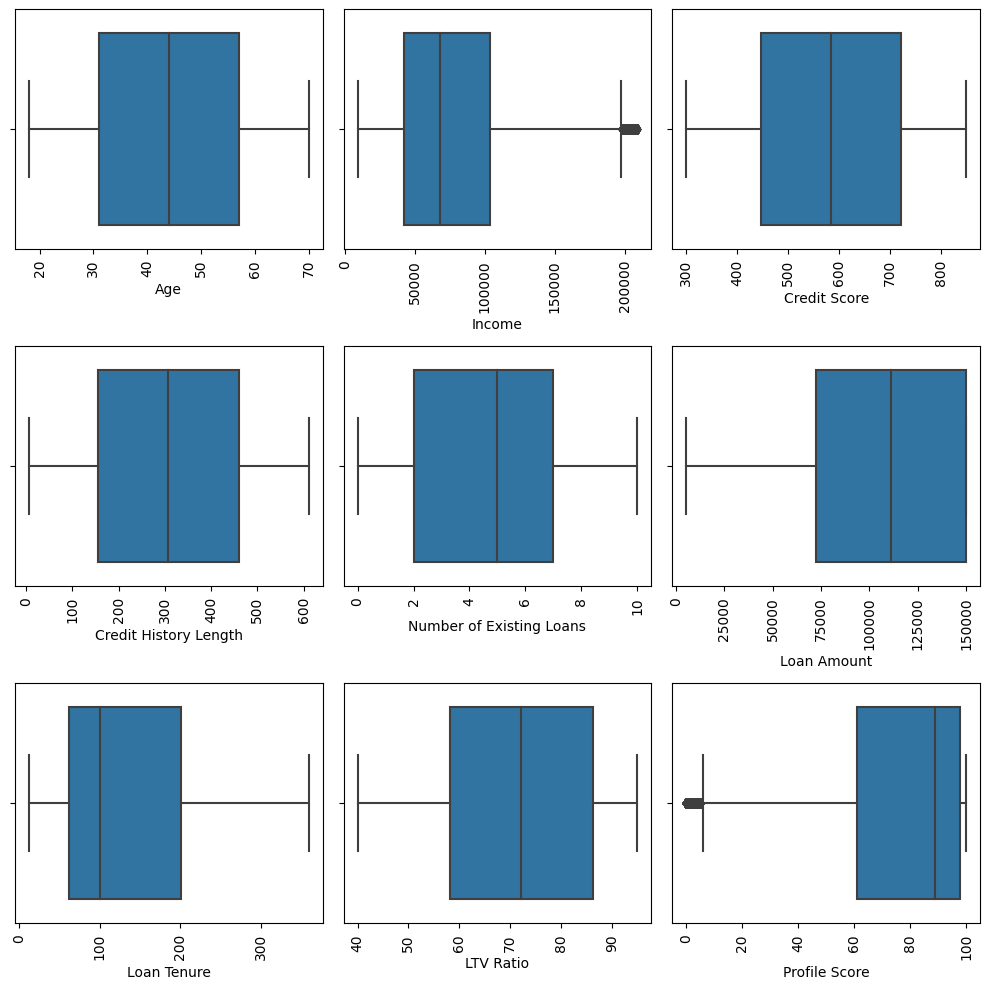

In [11]:
t = 1
plt.figure(figsize=(10,10))
for i in nums:
    plt.subplot(3,3,t)
    sns.boxplot(x=df[i])
    t +=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

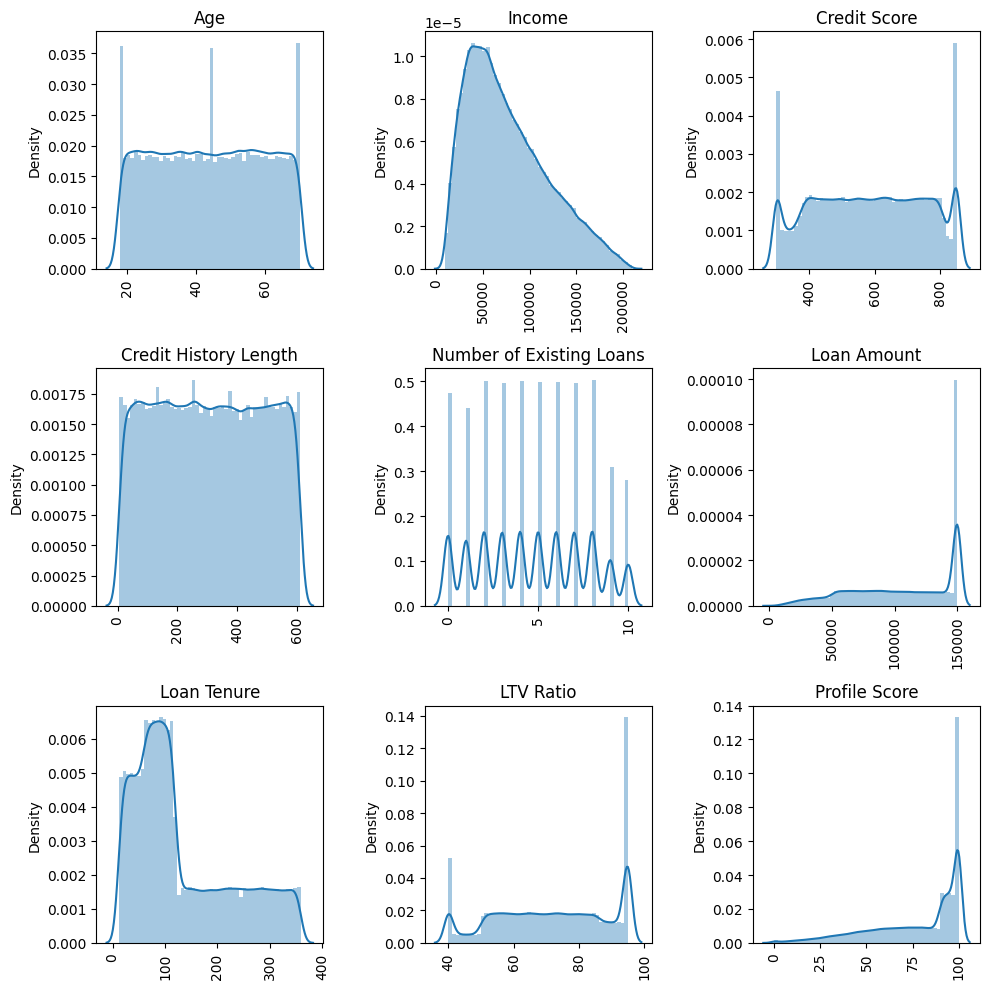

In [12]:
t = 1
plt.figure(figsize=(10,10))
for i in nums:
    plt.subplot(3,3,t)
    sns.distplot(x=df[i])
    t +=1
    plt.xticks(rotation=90)
    plt.title(i)
plt.tight_layout()
plt.show()

In [13]:
df.columns

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')

### Bivariate:

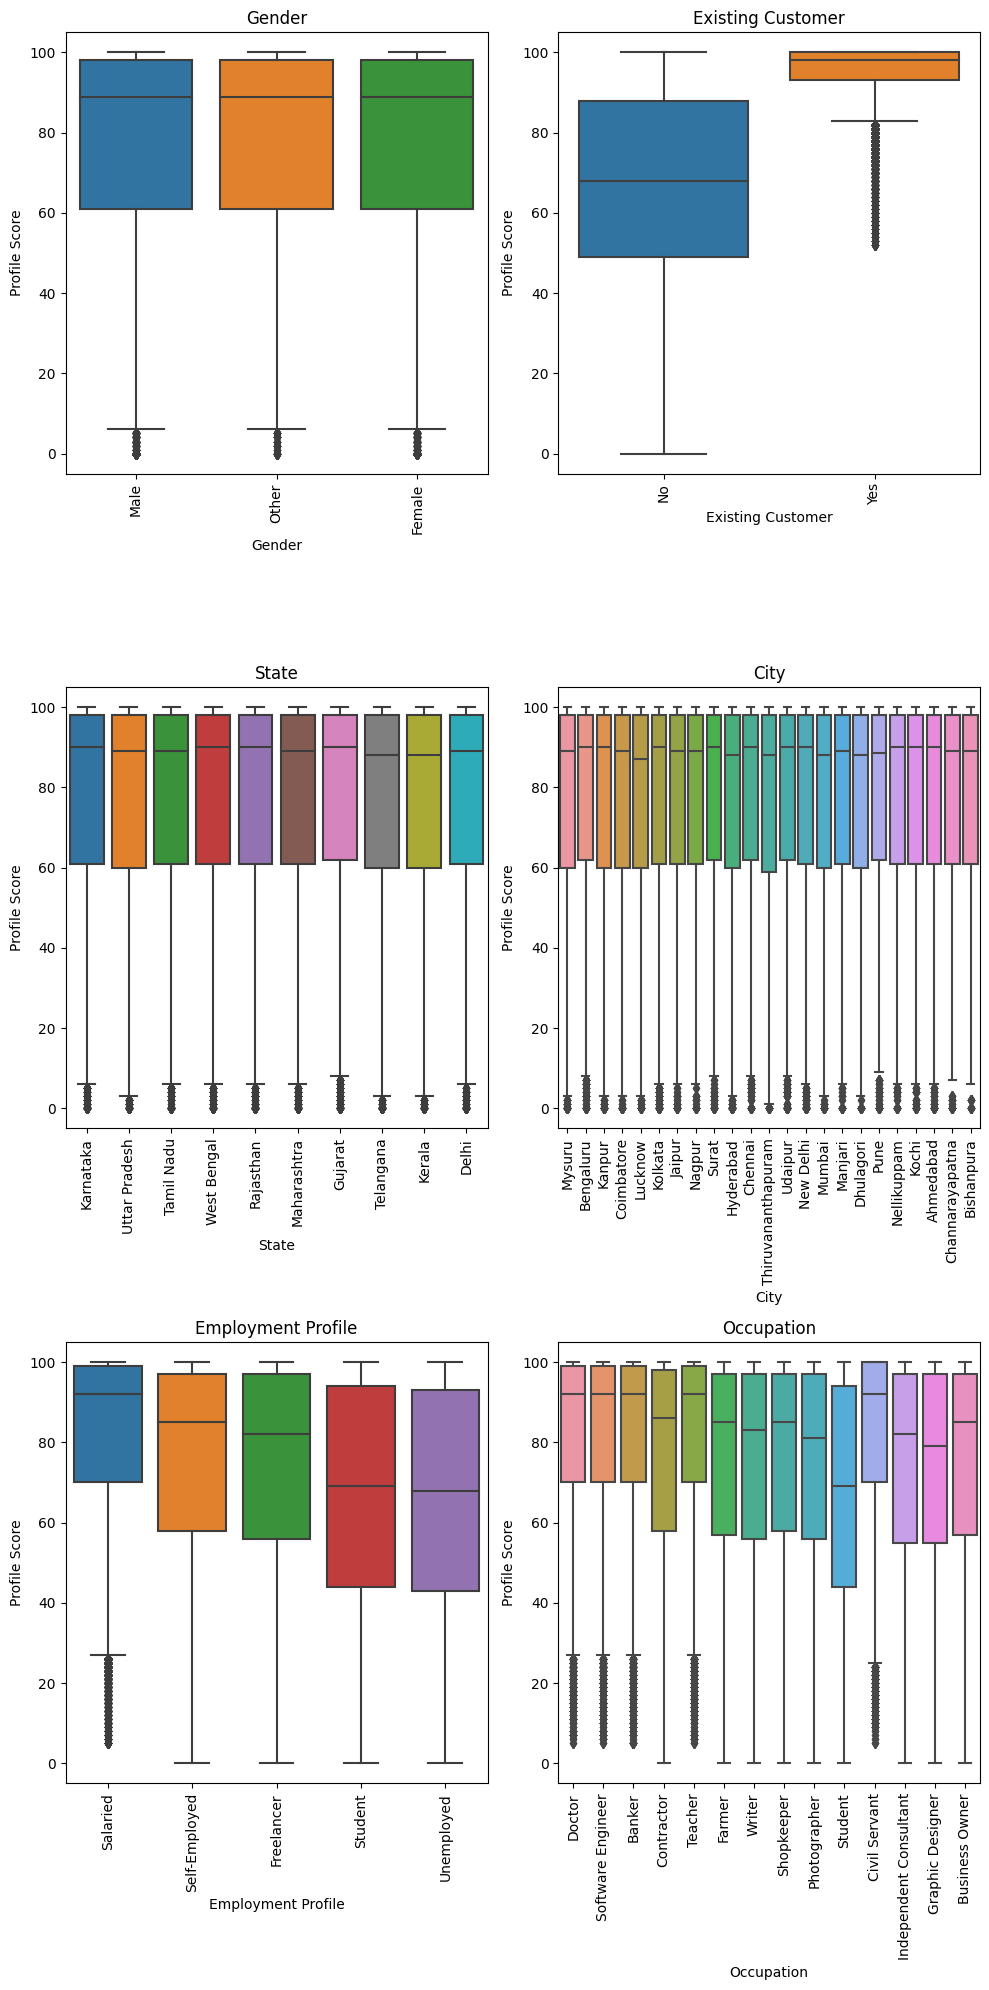

In [14]:
t = 1
plt.figure(figsize=(10,20))
for i in cats:
    plt.subplot(3,2,t)
    sns.boxplot(x=df[i],y= df['Profile Score'])
    t +=1
    plt.xticks(rotation=90)
    plt.title(i)
plt.tight_layout()
plt.show()

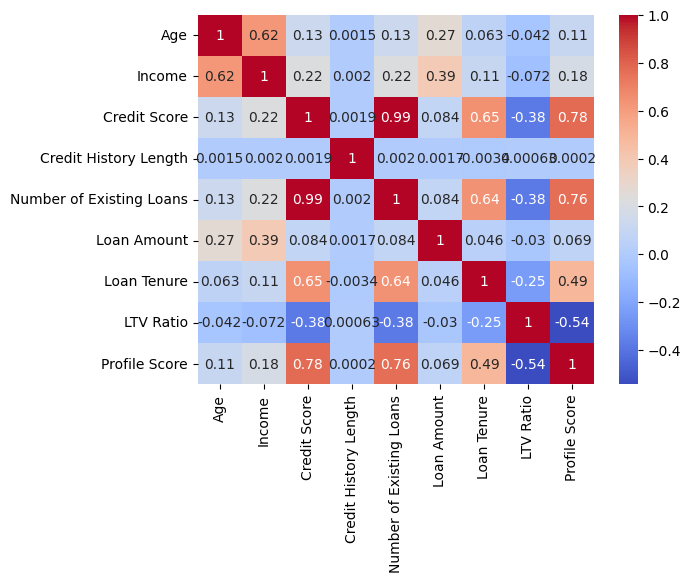

In [15]:
sns.heatmap(df[nums].corr(),annot = True,cmap='coolwarm');

### Missing Values:

In [16]:
df.isnull().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

In [17]:
df[df['Occupation'].isnull()==True]

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
25,61,Female,41000,307,104,0,23296,99,No,Rajasthan,Udaipur,58.686622,Unemployed,23,NaN
28,52,Female,87000,697,26,7,141231,70,Yes,Delhi,New Delhi,94.616809,Unemployed,58,NaN
31,57,Female,130000,850,600,10,56891,195,Yes,Telangana,Hyderabad,40.481983,Unemployed,96,NaN
33,53,Male,33000,428,576,2,99179,56,No,Delhi,New Delhi,53.836170,Unemployed,62,NaN
41,18,Other,16000,329,436,0,12592,119,No,Telangana,Hyderabad,94.802565,Unemployed,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279777,24,Female,67000,374,238,1,120860,81,No,Karnataka,Mysuru,52.352218,Unemployed,52,NaN
279792,24,Female,51000,514,549,3,150000,69,No,West Bengal,Kolkata,54.303719,Unemployed,80,NaN
279806,39,Male,22000,683,262,6,51961,261,Yes,West Bengal,Kolkata,93.614738,Unemployed,84,NaN
279825,70,Male,41000,626,151,5,139038,300,No,Telangana,Channarayapatna,53.113861,Unemployed,99,NaN


In [18]:
df['Occupation'].unique()

array(['Doctor', 'Software Engineer', 'Banker', 'Contractor', 'Teacher',
       'Farmer', 'Writer', 'Shopkeeper', 'Photographer', 'Student',
       'Civil Servant', nan, 'Independent Consultant', 'Graphic Designer',
       'Business Owner'], dtype=object)

In [19]:
df['Occupation'].fillna('Jobseeker',inplace=True)

In [20]:
df.isnull().sum()

Age                         0
Gender                      0
Income                      0
Credit Score                0
Credit History Length       0
Number of Existing Loans    0
Loan Amount                 0
Loan Tenure                 0
Existing Customer           0
State                       0
City                        0
LTV Ratio                   0
Employment Profile          0
Profile Score               0
Occupation                  0
dtype: int64

In [21]:
def credit_Class(x):
    if x>800:
        return 1
    else:
        return 0
df['Credit_Class'] = df['Credit Score'].apply(credit_Class)

In [22]:
bins = [300, 500, 649, 650, 750, 900]
label = ['Very Poor','Poor', 'Average', 'Good', 'Excellent']

In [23]:
df['Credit_Type'] = pd.cut(x = df['Credit Score'],bins=bins,labels=label,include_lowest=True)

In [24]:
df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation,Credit_Class,Credit_Type
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor,0,Poor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer,0,Very Poor
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker,1,Excellent
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor,0,Good
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher,0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer,0,Very Poor
279852,45,Female,124000,850,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant,1,Excellent
279853,33,Female,71000,582,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,Jobseeker,0,Poor
279854,67,Male,191000,411,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer,0,Very Poor


### Statistical Tests:

In [25]:
from scipy.stats import shapiro,levene,mannwhitneyu,kruskal

In [26]:
p=shapiro(df['Profile Score'])[1]
if p>0.05:
    print('Ho: Data is Normal')
else:
    print('Ho: Data is not Normal')

Ho: Data is not Normal


In [27]:
for i in nums:
    p_value = mannwhitneyu(df[i],df['Profile Score'])[1]
    print(f'P_value of {i} is {p_value}')

P_value of Age is 0.0
P_value of Income is 0.0
P_value of Credit Score is 0.0
P_value of Credit History Length is 0.0
P_value of Number of Existing Loans is 0.0
P_value of Loan Amount is 0.0
P_value of Loan Tenure is 0.0
P_value of LTV Ratio is 0.0
P_value of Profile Score is 1.0


In [28]:
for i in cats:
    groups = [df.loc[df[i] == group, 'Profile Score'].dropna() for group in df[i].unique()]
    p_value = kruskal(*groups)[1]
    print(f'P_value of {i} is {p_value}')

P_value of Gender is 0.07957585482212677
P_value of Existing Customer is 0.0
P_value of State is 0.002807750530630091
P_value of City is 4.487376378601657e-05
P_value of Employment Profile is 0.0
P_value of Occupation is 0.0


In [29]:
from scipy.stats import ttest_ind

In [30]:

for i in nums:
    p_value = ttest_ind(df[i],df['Profile Score'])[1]
    print(f'P_value of {i} is {p_value}')

P_value of Age is 0.0
P_value of Income is 0.0
P_value of Credit Score is 0.0
P_value of Credit History Length is 0.0
P_value of Number of Existing Loans is 0.0
P_value of Loan Amount is 0.0
P_value of Loan Tenure is 0.0
P_value of LTV Ratio is 0.0
P_value of Profile Score is 1.0


In [31]:
import statsmodels.formula.api as sma
from statsmodels.stats.anova import anova_lm

In [32]:
df.rename(columns={'Profile Score':'Profile_Score','Existing Customer':'Existing_Customer','Employment Profile':'Employment_Profile'},inplace=True)

In [33]:
model = sma.ols('Profile_Score~Gender+Existing_Customer+State+City+Employment_Profile+Occupation+Credit_Type+Credit_Class',data=df).fit()
anova_lm(model).iloc[:,-1]<0.5

Gender                 True
Existing_Customer      True
State                  True
City                   True
Employment_Profile     True
Occupation             True
Credit_Type            True
Credit_Class           True
Residual              False
Name: PR(>F), dtype: bool

In [34]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Gender,2.0,4.858291e+03,2.429145e+03,9.970629,4.676977e-05
Existing_Customer,1.0,5.899210e+07,5.899210e+07,242137.985654,0.000000e+00
State,9.0,1.105005e+04,1.227784e+03,5.039541,7.938800e-07
City,22.0,3.340759e+04,1.518527e+03,6.232919,1.251759e-18
Employment_Profile,4.0,6.789906e+06,1.697477e+06,6967.433361,0.000000e+00
Occupation,14.0,1.985153e+04,1.417966e+03,5.820161,1.507536e-11
Credit_Type,4.0,3.408513e+07,8.521283e+06,34976.314182,0.000000e+00
Credit_Class,1.0,1.336322e+04,1.336322e+04,54.850427,1.304232e-13
Residual,279803.0,6.816844e+07,2.436301e+02,NaN,NaN


In [35]:
df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing_Customer,State,City,LTV Ratio,Employment_Profile,Profile_Score,Occupation,Credit_Class,Credit_Type
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor,0,Poor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer,0,Very Poor
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker,1,Excellent
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor,0,Good
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher,0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer,0,Very Poor
279852,45,Female,124000,850,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant,1,Excellent
279853,33,Female,71000,582,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,Jobseeker,0,Poor
279854,67,Male,191000,411,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer,0,Very Poor


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
state = le.fit_transform(df['State'])
df['State'] = state

In [38]:
le = LabelEncoder()
city = le.fit_transform(df['City'])
df['City'] = city

In [39]:
df['Employment_Profile'].unique()

array(['Salaried', 'Self-Employed', 'Freelancer', 'Student', 'Unemployed'],
      dtype=object)

In [40]:
occupation = le.fit_transform(df['Occupation'])
df['Occupation'] = occupation

In [41]:
cr_ty = le.fit_transform(df['Credit_Type'])
df['Credit_Type'] = cr_ty

In [42]:
df1 = pd.get_dummies(df,drop_first=True,dtype=int)

In [43]:
x = df1.drop(columns='Profile_Score')
y = df1['Profile_Score']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.20,random_state=10,shuffle=True)

In [46]:
trainx.shape,testx.shape,trainy.shape,testy.shape

((223884, 20), (55972, 20), (223884,), (55972,))

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [48]:
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    pred = m.predict(testx)
    print('MSE',mean_squared_error(testy,pred))
    print('RMSE',np.sqrt(mean_squared_error(testy,pred)))
    print('MAE',mean_absolute_error(testy,pred))
    print('MAPE',mean_absolute_percentage_error(testy,pred))
    r2 = r2_score(testy,pred)
    print('R Squared:',r2)

In [49]:
model_validation(LinearRegression(),trainx,trainy,testx,testy)

MSE 142.06669680768144
RMSE 11.919173495158187
MAE 9.777346932928578
MAPE 332505663569379.94
R Squared: 0.7631786887556503


In [50]:
model_validation(RandomForestRegressor(),trainx,trainy,testx,testy)

MSE 10.988552170728221
RMSE 3.31489851590184
MAE 2.055174194239977
MAPE 48553779731659.66
R Squared: 0.981682383048072


In [51]:
model_validation(GradientBoostingRegressor(),trainx,trainy,testx,testy)

MSE 77.6615126330289
RMSE 8.812576957566323
MAE 6.90946707992398
MAPE 147982094963310.8
R Squared: 0.8705403752726719


In [52]:
model_validation(XGBRegressor(),trainx,trainy,testx,testy)

MSE 68.80285249567817
RMSE 8.294748488994598
MAE 6.485254896773576
MAPE 133249625755917.14
R Squared: 0.8853075202597582
